In [ ]:
# Rain, Cool, Normal, Strong


=== Feature Names ===
- Outlook
- Temperature
- Humidity
- Windy

Class Label: Class (Yes/No)

=== Enter the feature values ===
(Enter values for: Outlook, Temperature, Humidity, Windy)

Randomly generated feature input:
Outlook: Sunny
Temperature: Mild
Humidity: High
Windy: Weak

=== Class Probabilities ===
P(Class = Yes) = 0.6429
P(Class = No) = 0.3571

=== Conditional Probabilities Given Class = Yes ===
P(Outlook = Sunny | Class = Yes) = 0.2222
P(Temperature = Mild | Class = Yes) = 0.4444
P(Humidity = High | Class = Yes) = 0.3333
P(Windy = Weak | Class = Yes) = 0.5556

=== Conditional Probabilities Given Class = No ===
P(Outlook = Sunny | Class = No) = 0.6
P(Temperature = Mild | Class = No) = 0.4
P(Humidity = High | Class = No) = 0.8
P(Windy = Weak | Class = No) = 0.4

=== Likelihoods ===
P(X | Class = Yes) = 0.0183
P(X | Class = No) = 0.0768

=== Final Scores ===
Final Score for Class = Yes: 0.0118
Final Score for Class = No: 0.0274

=== Final Prediction ===
Since 0.0118 < 0.0274,

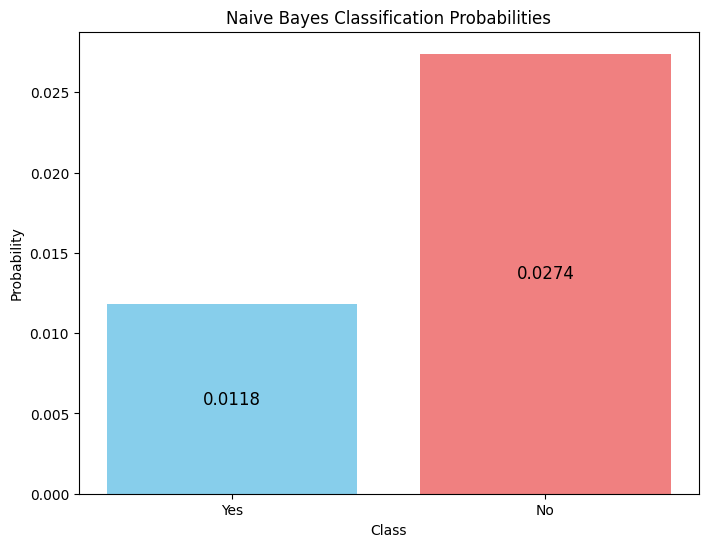

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# === Function Definitions ===

def calculate_class_probability(data, class_column, class_value):
    """Calculate the prior probability of a given class."""
    return round(len(data[data[class_column] == class_value]) / len(data), 4)

def calculate_conditional_probability(data, feature, class_column, feature_value, class_value):
    """Calculate conditional probability P(feature_value | class_value)."""
    numerator = len(data[(data[feature] == feature_value) & (data[class_column] == class_value)])
    denominator = len(data[data[class_column] == class_value])
    probability = round(numerator / denominator, 4) if denominator != 0 else 0
    print(f"P({feature} = {feature_value} | Class = {class_value}) = {probability}")
    return probability

def compute_likelihood(probabilities):
    """Multiply all conditional probabilities to get the likelihood."""
    result = 1.0
    for prob in probabilities:
        result *= prob
    return round(result, 4)

# === Main Flow ===

# Load dataset
data = pd.read_csv('/content/plays_football.csv')

# Automatically get feature names (all columns except 'Class')
features = [col for col in data.columns if col != 'Class']

# Display feature names
print("\n=== Feature Names ===")
for feature in features:
    print(f"- {feature}")
print("\nClass Label: Class (Yes/No)")

# Prompt user input after showing the headings
print("\n=== Enter the feature values ===")
print(f"(Enter values for: {', '.join(features)})")


# X = input("Enter comma-separated values: ").split(",")
# X = [item.strip() for item in X]

# Generate random input from dataset for each feature
X = [random.choice(data[feature].unique()) for feature in features]

# Display generated input
print("\nRandomly generated feature input:")
for feature, value in zip(features, X):
    print(f"{feature}: {value}")

# Display class probabilities
print("\n=== Class Probabilities ===")
prob_class_Yes = calculate_class_probability(data, "Class", "Yes")
prob_class_No = calculate_class_probability(data, "Class", "No")
print(f"P(Class = Yes) = {prob_class_Yes}")
print(f"P(Class = No) = {prob_class_No}")

# Calculate P(X | Yes)
print("\n=== Conditional Probabilities Given Class = Yes ===")
probabilities_Yes = []
for i in range(len(X)):
    prob = calculate_conditional_probability(data, features[i], "Class", X[i], "Yes")
    probabilities_Yes.append(prob)

# Calculate P(X | No)
print("\n=== Conditional Probabilities Given Class = No ===")
probabilities_No = []
for i in range(len(X)):
    prob = calculate_conditional_probability(data, features[i], "Class", X[i], "No")
    probabilities_No.append(prob)

# Calculate overall likelihood
prob_X_given_Yes = compute_likelihood(probabilities_Yes)
prob_X_given_No = compute_likelihood(probabilities_No)

print("\n=== Likelihoods ===")
print(f"P(X | Class = Yes) = {prob_X_given_Yes}")
print(f"P(X | Class = No) = {prob_X_given_No}")

# Final Naive Bayes probability calculation
final_prob_Yes = round(prob_class_Yes * prob_X_given_Yes, 4)
final_prob_No = round(prob_class_No * prob_X_given_No, 4)

print("\n=== Final Scores ===")
print(f"Final Score for Class = Yes: {final_prob_Yes}")
print(f"Final Score for Class = No: {final_prob_No}")

# Final Prediction
print("\n=== Final Prediction ===")
if final_prob_Yes > final_prob_No:
    print(f"Since {final_prob_Yes} > {final_prob_No}, the Naive Bayes Classifier predicts: Class(plays_football) = Yes")
else:
    print(f"Since {final_prob_Yes} < {final_prob_No}, the Naive Bayes Classifier predicts: Class(plays_football) = No")

# Data for the histogram
classes = ["Yes", "No"]
probabilities = [final_prob_Yes, final_prob_No]

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bars = plt.bar(classes, probabilities, color=['skyblue', 'lightcoral'])
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Naive Bayes Classification Probabilities")

# Add probability values inside each bar
for i, prob in enumerate(probabilities):
    plt.text(i, prob / 2, f"{prob:.4f}", ha='center', va='center', color='black', fontsize=12)
plt.show()
